# Lesson 4 Class Exercise

This exercise aims to introduce students to Support Vector Machines (SVM) and compare its performance with other classification algorithms. We will use three different datasets to explore SVM's capabilities and limitations.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


## Dataset Generation
Below are three datasets: linearly separable, linearly separable with outliers, and nonlinearly separable.

In [ ]:
from sklearn.datasets import make_blobs, make_circles

# Linearly separable data
X_linear, y_linear = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)

# Linearly separable with outliers
X_outliers, y_outliers = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
# Add outliers
X_outliers = np.concatenate([X_outliers, np.array([[3, 3], [3, 2], [-3, -3], [-3, -2]])], axis=0)
y_outliers = np.concatenate([y_outliers, np.array([0, 0, 1, 1])])

# Nonlinearly separable data
X_nonlinear, y_nonlinear = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=0)


## Question 1: Visualize the three datasets.


Text(0.5, 1.0, 'Nonlinearly Separable')

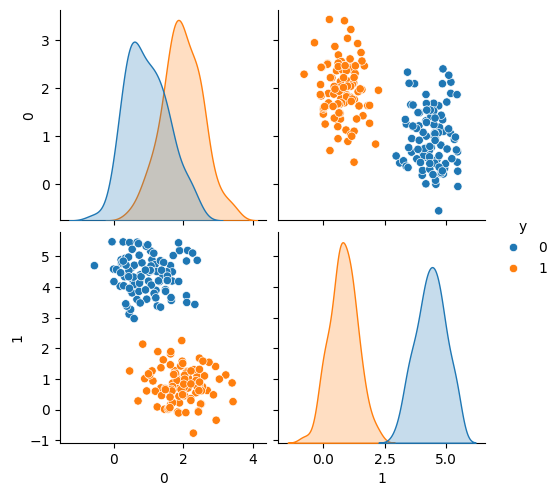

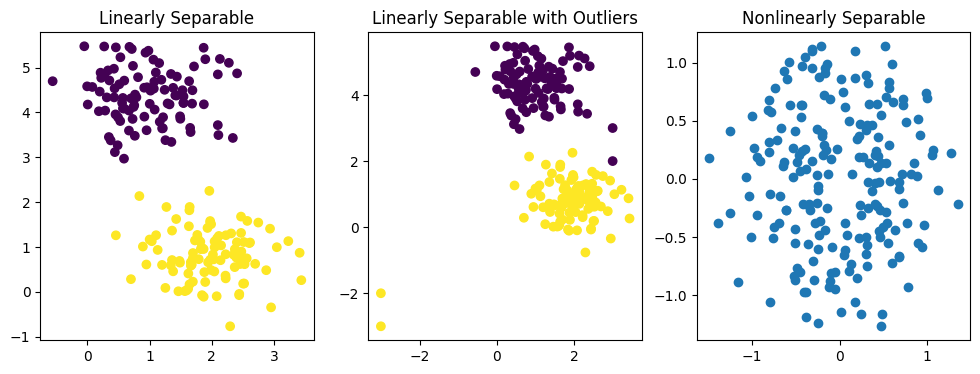

In [42]:
import seaborn as sns

df = pd.DataFrame(X_linear)
df['y'] = y_linear

sns.pairplot(df, hue='y')

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear)
plt.title('Linearly Separable')

plt.subplot(132)
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c=y_outliers)
plt.title('Linearly Separable with Outliers')

plt.subplot(133)
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1])
plt.title("Nonlinearly Separable")

## Question 2: Split each dataset into training and testing sets (80/20 split).


In [27]:
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X_linear, y_linear, random_state=0, train_size=0.8)

X_outliers_train, X_outliers_test, y_outliers_train, y_outliers_test = train_test_split(X_outliers, y_outliers, random_state=0, train_size=0.8)

X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test = train_test_split(X_nonlinear, y_nonlinear, random_state=0, train_size=0.8)

## Question 3: Train SVM, Decision Tree, Random Forest, and Logistic Regression models on each dataset.

For linear datasets use SVM kernel='linear'
For nonlinear dataset SVM kernel='rbf'


In [29]:
svc_linear = SVC(kernel='linear').fit(X=X_linear_train, y=y_linear_train)
svc_outliers = SVC(kernel='linear').fit(X=X_outliers_train, y=y_outliers_train)
svc_nonlinear = SVC(kernel='rbf').fit(X=X_nonlinear_train, y=y_nonlinear_train)

In [32]:
dt_linear = DecisionTreeClassifier().fit(X=X_linear_train, y=y_linear_train)
dt_outliers = DecisionTreeClassifier().fit(X=X_outliers_train, y=y_outliers_train)
dt_nonlinear = DecisionTreeClassifier().fit(X=X_nonlinear_train, y=y_nonlinear_train)

In [33]:
rf_linear = RandomForestClassifier().fit(X=X_linear_train, y=y_linear_train)
rf_outliers = RandomForestClassifier().fit(X=X_outliers_train, y=y_outliers_train)
rf_nonlinear = RandomForestClassifier().fit(X=X_nonlinear_train, y=y_nonlinear_train)

In [34]:
lgr_linear = LogisticRegression().fit(X=X_linear_train, y=y_linear_train)
lgr_outliers = LogisticRegression().fit(X=X_outliers_train, y=y_outliers_train)
lgr_nonlinear = LogisticRegression().fit(X=X_nonlinear_train, y=y_nonlinear_train)

## Question 4: Evaluate the models using accuracy

In [30]:
print(classification_report(y_true=y_linear_test, y_pred=svc_linear.predict(X_linear_test)))
print(classification_report(y_true=y_outliers_test, y_pred=svc_outliers.predict(X_outliers_test)))
print(classification_report(y_true=y_nonlinear_test, y_pred=svc_nonlinear.predict(X_nonlinear_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        19

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.83      0.91        18

    accuracy                           0.93        40
   macro avg       0.94      0.92      0.92        40
weighted avg       0.93      0.93      0.92        40



In [35]:
print(classification_report(y_true=y_linear_test, y_pred=dt_linear.predict(X_linear_test)))
print(classification_report(y_true=y_outliers_test, y_pred=dt_outliers.predict(X_outliers_test)))
print(classification_report(y_true=y_nonlinear_test, y_pred=dt_nonlinear.predict(X_nonlinear_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        19

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.79      0.83      0.81        18

    accuracy                           0.82        40
   macro avg       0.82      0.83      0.82        40
weighted avg       0.83      0.82      0.83        40



In [36]:
print(classification_report(y_true=y_linear_test, y_pred=rf_linear.predict(X_linear_test)))
print(classification_report(y_true=y_outliers_test, y_pred=rf_outliers.predict(X_outliers_test)))
print(classification_report(y_true=y_nonlinear_test, y_pred=rf_nonlinear.predict(X_nonlinear_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        19

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.94      0.83      0.88        18

    accuracy                           0.90        40
   macro avg       0.91      0.89      0.90        40
weighted avg       0.90      0.90      0.90        40



In [37]:
print(classification_report(y_true=y_linear_test, y_pred=lgr_linear.predict(X_linear_test)))
print(classification_report(y_true=y_outliers_test, y_pred=lgr_outliers.predict(X_outliers_test)))
print(classification_report(y_true=y_nonlinear_test, y_pred=lgr_nonlinear.predict(X_nonlinear_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        19

    accuracy                           1.00        41
   macro avg       1.00      1.00      1.00        41
weighted avg       1.00      1.00      1.00        41

              precision    recall  f1-score   support

           0       0.45      0.23      0.30        22
           1       0.41      0.67      0.51        18

    accuracy                           0.42        40
   macro avg       0.43      0.45      0.41        40
weighted avg       0.44      0.42      0.40        40



## Question 5: Visualize the decision boundaries for all four models on each dataset.


In [ ]:
import matplotlib.pyplot as plt

def plot_decision_boundary(X, y, model):
  # Create a meshgrid of points
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = 0.02  # Step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Predict the class for each point in the mesh
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the contour plot
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Decision Boundary')
  plt.show()



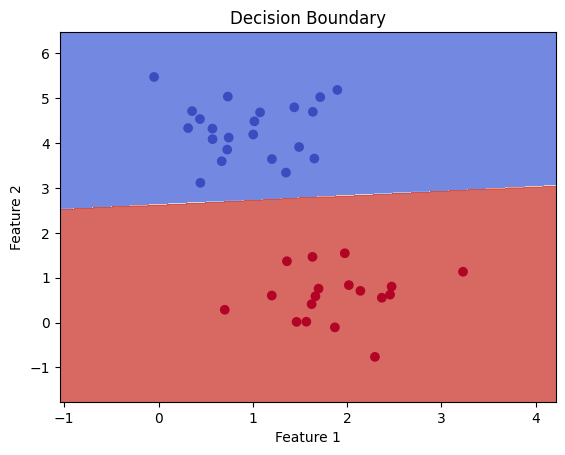

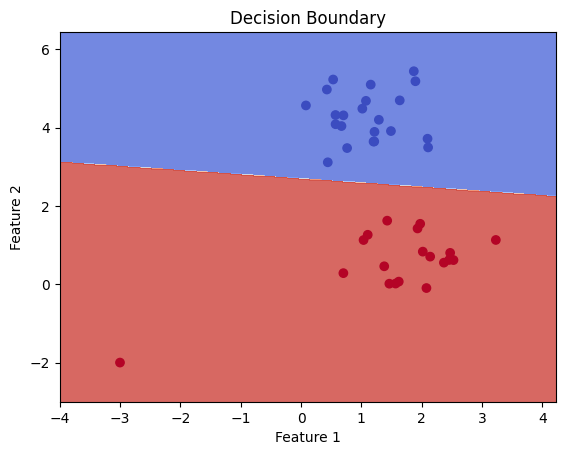

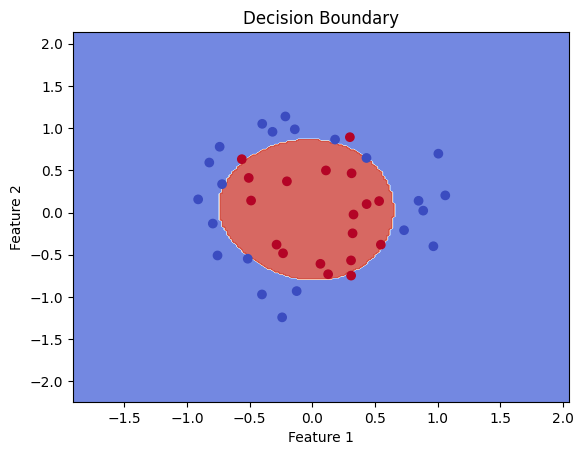

In [31]:
plot_decision_boundary(X_linear_test, y_linear_test, svc_linear)
plot_decision_boundary(X_outliers_test, y_outliers_test, svc_outliers)
plot_decision_boundary(X_nonlinear_test, y_nonlinear_test, svc_nonlinear)

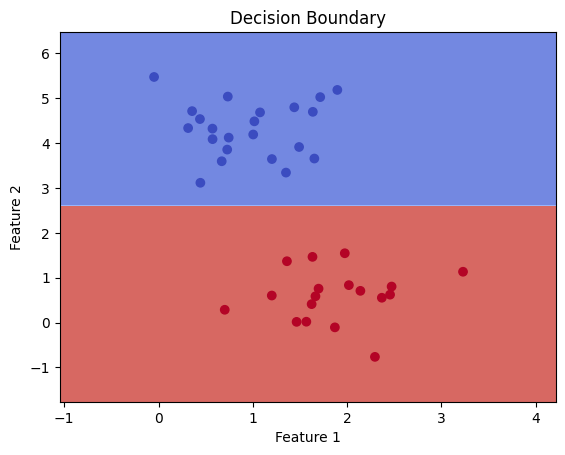

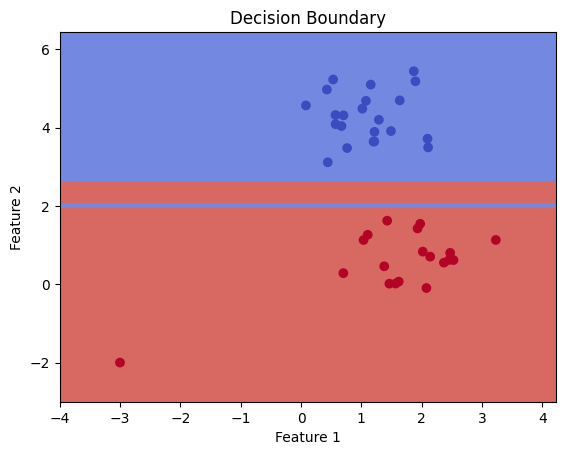

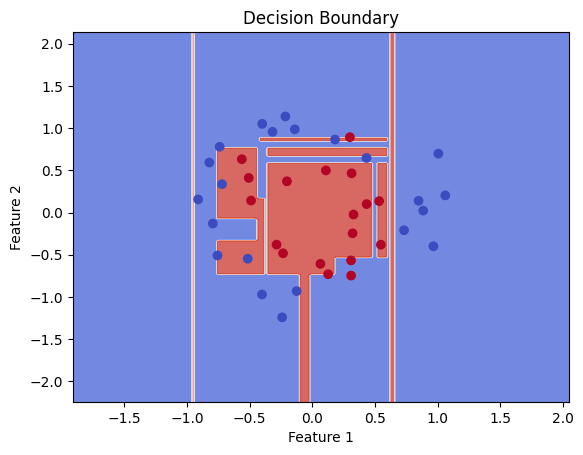

In [38]:
plot_decision_boundary(X_linear_test, y_linear_test, dt_linear)
plot_decision_boundary(X_outliers_test, y_outliers_test, dt_outliers)
plot_decision_boundary(X_nonlinear_test, y_nonlinear_test, dt_nonlinear)

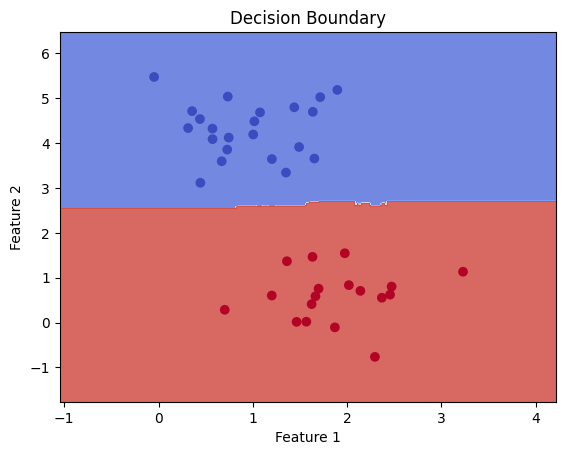

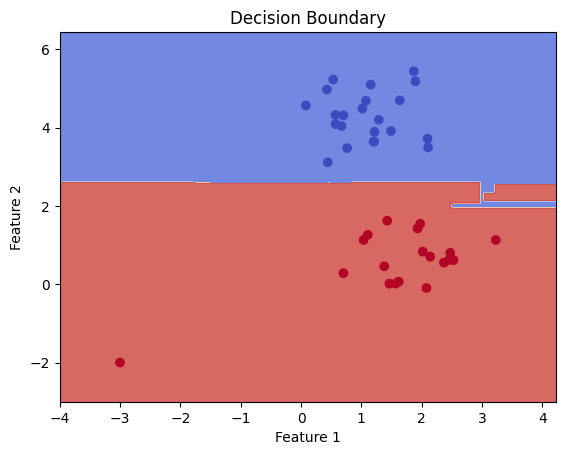

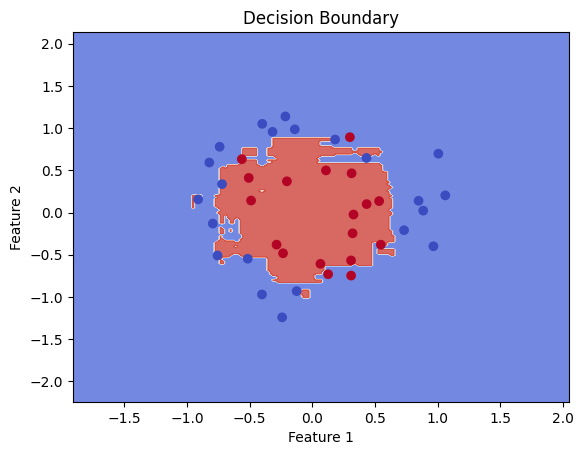

In [39]:
plot_decision_boundary(X_linear_test, y_linear_test, rf_linear)
plot_decision_boundary(X_outliers_test, y_outliers_test, rf_outliers)
plot_decision_boundary(X_nonlinear_test, y_nonlinear_test, rf_nonlinear)

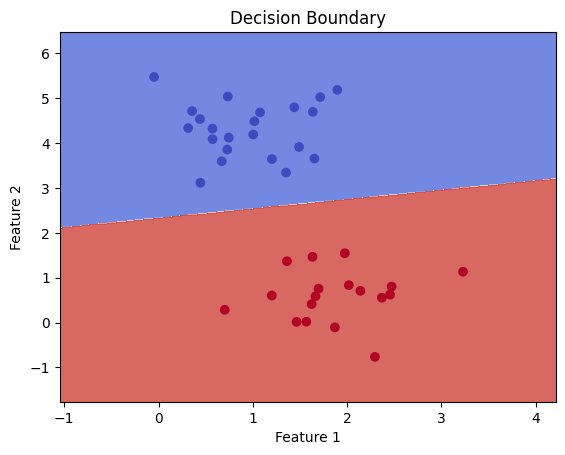

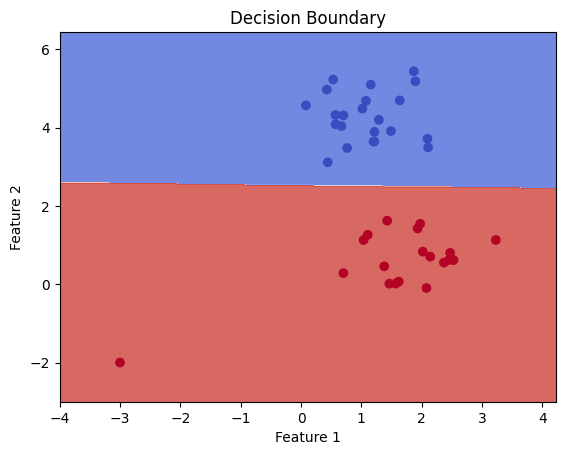

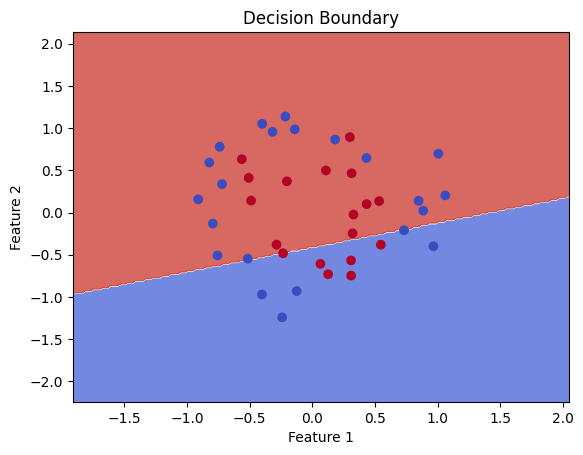

In [40]:
plot_decision_boundary(X_linear_test, y_linear_test, lgr_linear)
plot_decision_boundary(X_outliers_test, y_outliers_test, lgr_outliers)
plot_decision_boundary(X_nonlinear_test, y_nonlinear_test, lgr_nonlinear)